In [82]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import colors
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib        as mpl

%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/upwelling_depth/')
import upwelling_functions

import warnings
warnings.filterwarnings("ignore")

import time
from datetime import datetime 

In [2]:
def define_files():
    fname = '1_MCKNZ_1h_20170101_201701*'
    meshmaskname = '1_mesh_mask.nc'

    vosaline_ref = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/salinity/salinity_for_agrif.nc')['vosaline'][:]
    vosaline_ref_profile = vosaline_ref[0, :, 0, 0]
    
    return fname, meshmaskname, vosaline_ref_profile

In [3]:
def get_depth_upwelled(dirname, dep_ind_slice, time_s):
    
    fname, meshmaskname, vosaline_ref_profile = define_files()
    
    time_f = time_s+24

    vosaline, sozotaux, deptht, tmask = upwelling_functions.get_vars_salt(dirname, fname, meshmaskname, dep_ind_slice, time_s, time_f, None)

    vosaline_daily = upwelling_functions.get_daily_vosaline(vosaline, tmask, None)

    depth_ind_daily = upwelling_functions.get_daily_depth_ind(vosaline_daily, vosaline_ref_profile)
    depth_m_daily, depth_upwelled = upwelling_functions.get_daily_depth_m(deptht, dep_ind_slice, depth_ind_daily, tmask)
    
    return depth_upwelled

# Ideal

In [4]:
kind = 'ideal'
case = 'base'
dirname = '/ocean/imachuca/Canyons/results_mackenzie/extended_domain/'+kind+'_'+case+'/'

In [5]:
nc_depth_upwelled = nc.Dataset('./depth_upwelled_ideal_base.nc')

depth_upwelled_9_11 = nc_depth_upwelled['depth_upwelled_9_11'][:]
depth_upwelled_9_35 = nc_depth_upwelled['depth_upwelled_9_35'][:]
depth_upwelled_9_107 = nc_depth_upwelled['depth_upwelled_9_107'][:]

depth_upwelled_11_11 = nc_depth_upwelled['depth_upwelled_11_11'][:, :]
depth_upwelled_11_35 = nc_depth_upwelled['depth_upwelled_11_35'][:]
depth_upwelled_11_107 = nc_depth_upwelled['depth_upwelled_11_107'][:]

depth_upwelled_18_11 = nc_depth_upwelled['depth_upwelled_18_11'][:]
depth_upwelled_18_35 = nc_depth_upwelled['depth_upwelled_18_35'][:]
depth_upwelled_18_107 = nc_depth_upwelled['depth_upwelled_18_107'][:]

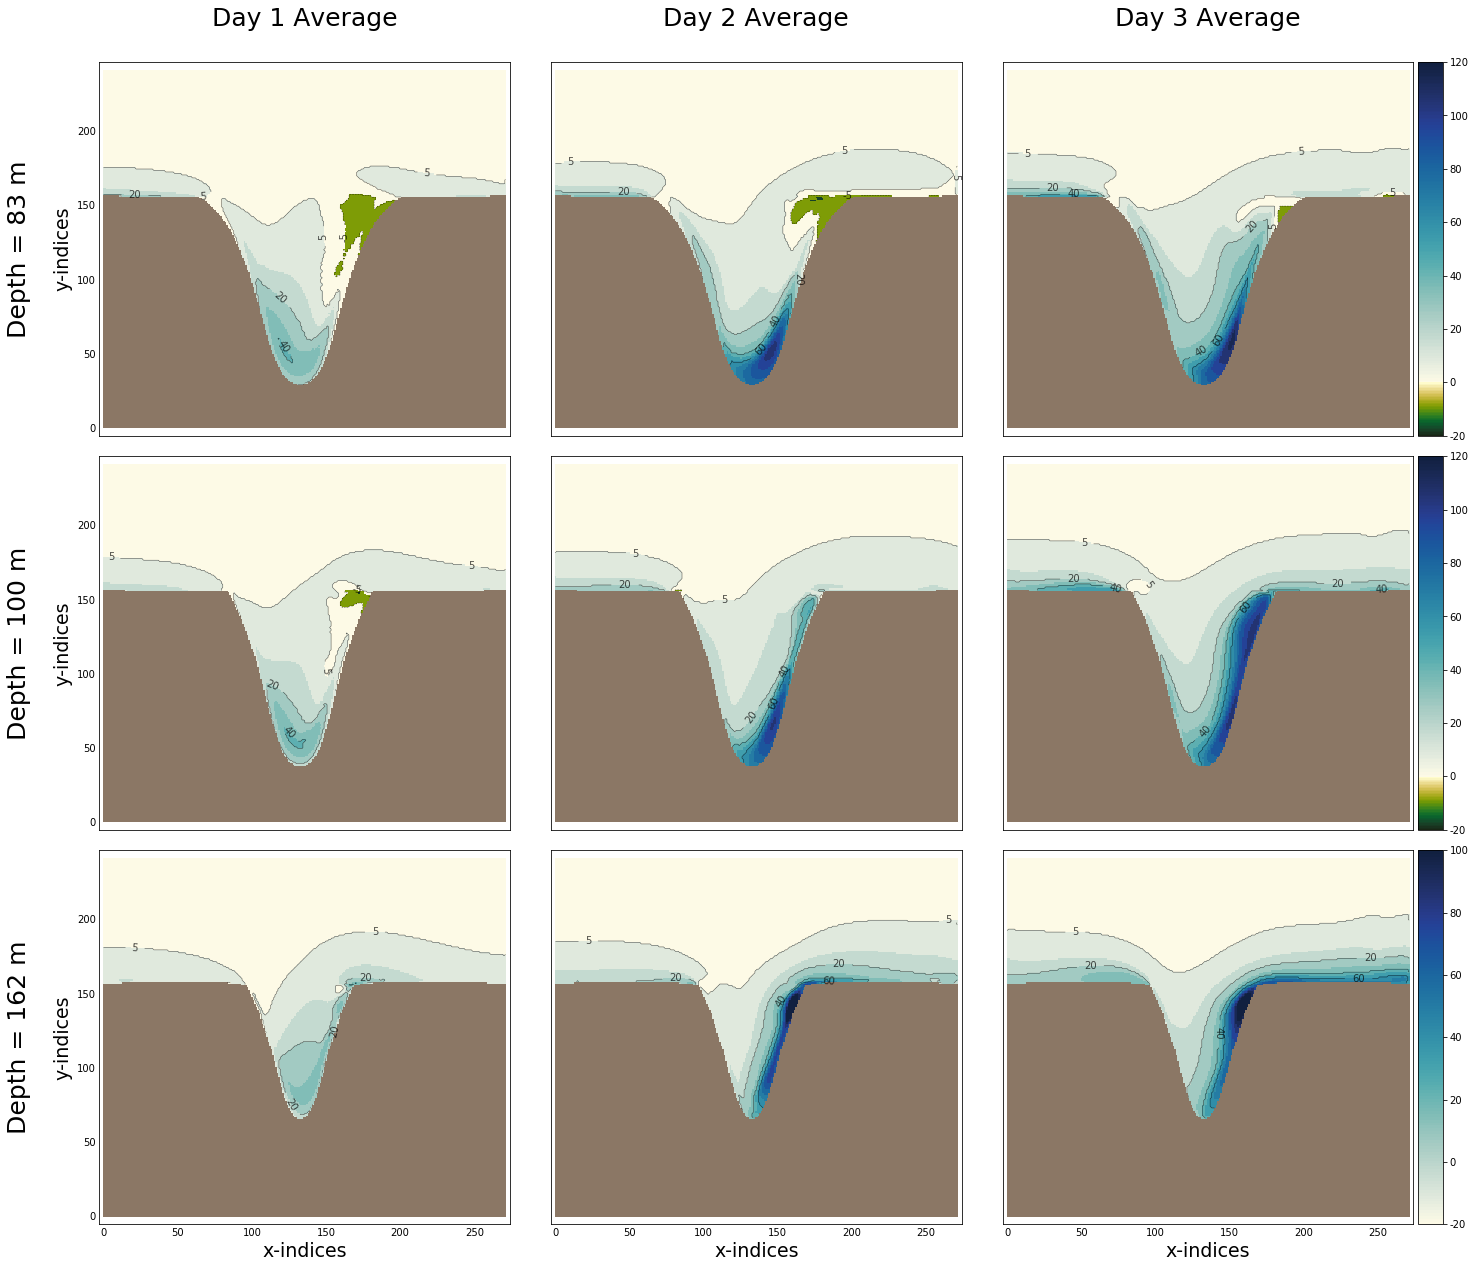

In [176]:
depth_upwelled_9=[depth_upwelled_9_11, depth_upwelled_9_35, depth_upwelled_9_107]
depth_upwelled_11=[depth_upwelled_11_11, depth_upwelled_11_35, depth_upwelled_11_107]
depth_upwelled_18=[depth_upwelled_18_11, depth_upwelled_18_35, depth_upwelled_18_107]

ttls = ['Day 1 Average', 'Day 2 Average', 'Day 3 Average']
depth_upwelled_rows = [depth_upwelled_9, depth_upwelled_11, depth_upwelled_18]
depths = ['83 m', '100 m', '162 m']

vmins = [-20, -20, 0]
vmaxs = [120, 120, 120]
levels = [-5, 5, 20, 40, 60]


fig, axes = plt.subplots(3, 4, sharex=True, sharey=True, gridspec_kw={'width_ratios': [5, 5, 5, 0.1]}, figsize=(20, 17.5))

for row in range(3):
    vmin = vmins[row]
    vmax = vmaxs[row]
    ticks = np.arange(-20, vmax+20, 20)
    for col in range(3):
        
        ax=axes[row, col]
        
        cmap, norm = cmo.cm.delta_r, upwelling_functions.MidpointNormalize(midpoint=0)
        cmap.set_bad('#8b7765')
        
        depth_upwelled = depth_upwelled_rows[row][col]
        xs = np.arange(depth_upwelled.shape[-1])
        ys = np.arange(depth_upwelled.shape[-2])
        
        p = ax.pcolormesh(xs, ys, depth_upwelled, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
        cs = ax.contour(xs, ys, depth_upwelled, levels=levels, colors='k', alpha=0.7, linewidths=0.5)
        ax.clabel(cs, inline=1, fontsize=10, fmt ='%1.f', colors='k')
        
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_aspect(aspect='equal')
        ax.set_xlim([0, xs[-1]])
        ax.set_ylim([0, ys[-1]])
        
        if row==0: ax.set_title(ttls[col], fontsize=25, y=1.08)
        else: pass
        
        if row==2: ax.set_xlabel('x-indices', fontsize=19)
        else:pass
        
        if col==0:
            ax.set_ylabel('y-indices', fontsize=19)
            ax.annotate('Depth = '+depths[row], xy=(0, 0.5), xytext=(-80, 0),
                        xycoords=('axes fraction'), textcoords='offset points',
                        size=25, ha='center', va='center', rotation='vertical')
        else: pass

    axc = axes[row, 3] 
    axc.axis('off')
    cbar = fig.colorbar(p, ax=axc, orientation='vertical', fraction=5.5, aspect=15)
    cbar.set_ticks(ticks)
    cbar.set_ticklabels(ticks)
    

fig.patch.set_facecolor('white')    
fig.tight_layout(w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.96)
fig.savefig('./ideal_displacement.png', dpi=200, bbox_inches='tight', format='png', facecolor=fig.get_facecolor())